<a href="https://colab.research.google.com/github/Bhagyasri00/Munnar_Data_analysis/blob/main/Munnar_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys

In [ ]:
df= pd.read_csv('/content/Data Analyst munnar Dataset.csv')
df.head()

,Hotel Name\t\t\t\t\t\t\t\t\t,Rating,Rating Description,Reviews,Star Rating,Location,Nearest Landmark,Distance to Landmark,Price,Tax
0,Gokulam Park,4.1,Very Good,1058,4.0,Chithirapuram,city centre,10.2 km,"2,728",574
1,Sterling Munnar,3.8,Very Good,1088,4.0,Chinnakanal,city centre,19.2 km,"4,451",969
2,Issacs Residency,4.1,Very Good,322,3.0,Central Munnar,Attukal Waterfalls,950 m,"2,758",684
3,Tea Valley Resort,4.3,Excellent,1337,4.0,Pallivasal,city centre,4.8 km,"2,675",756
4,Grand Plaza,4.3,Excellent,1058,4.0,Moolakadai,Attukal Waterfalls,1.9 km,"3,203",654


In [ ]:
print('Rows and Columns:', df.shape)

Rows and Columns: (74, 10)


In [ ]:
print('Column Names:', df.columns)

Column Names: Index(['Hotel Name\t\t\t\t\t\t\t\t\t', 'Rating', 'Rating Description',
       'Reviews', 'Star Rating', 'Location', 'Nearest Landmark',
       'Distance to Landmark', 'Price', 'Tax'],
      dtype='object')


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Hotel Name									   74 non-null     object 
 1   Rating                74 non-null     float64
 2   Rating Description    74 non-null     object 
 3   Reviews               74 non-null     int64  
 4   Star Rating           57 non-null     float64
 5   Location              74 non-null     object 
 6   Nearest Landmark      74 non-null     object 
 7   Distance to Landmark  74 non-null     object 
 8   Price                 74 non-null     object 
 9   Tax                   72 non-null     object 
dtypes: float64(2), int64(1), object(7)
memory usage: 5.9+ KB
None


Since Price, tax, Distance to landmark are in object dtype, converting them to float

In [ ]:
df['Price'] = df['Price'].apply(lambda x: str(x))
df['Price']= df['Price'].apply(lambda x: x.replace(",", ""))
df['Price'] = df['Price'].astype('float64')

In [ ]:
def convert_distance(distance):
  value, unit = distance.split()
  value = float(value)
  if unit.lower() == 'km':
      return round(value, 2)
  elif unit.lower() == 'm':
      value_km = value / 1000
      return round(value_km,2)
  else:
      raise ValueError("Unsupported unit:", unit)

In [ ]:
df['Distance to Landmark'] = df['Distance to Landmark'].apply(convert_distance)
df.rename(columns={'Distance to Landmark': 'Distance to Landmark(km)'}, inplace= True)

In [ ]:
df['Distance to Landmark(km)'] = df['Distance to Landmark(km)'].astype('float64')

In [ ]:
df['Tax'] = df['Tax'].apply(lambda x: str(x))
df['Tax'] = df['Tax'].apply(lambda x: x.replace(',' , ''))
df['Tax'] = df['Tax'].astype('float64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Hotel Name									       74 non-null     object 
 1   Rating                    74 non-null     float64
 2   Rating Description        74 non-null     object 
 3   Reviews                   74 non-null     int64  
 4   Star Rating               57 non-null     float64
 5   Location                  74 non-null     object 
 6   Nearest Landmark          74 non-null     object 
 7   Distance to Landmark(km)  74 non-null     float64
 8   Price                     74 non-null     float64
 9   Tax                       72 non-null     float64
dtypes: float64(5), int64(1), object(4)
memory usage: 5.9+ KB


In [ ]:
print('Size of Data Frame:', sys.getsizeof(df))

Size of Data Frame: 24969


Checking if there are any null values

In [ ]:
print("Missing values in Dataset:",'\n',df.isnull().sum())

Missing values in Dataset: 
 Hotel Name\t\t\t\t\t\t\t\t\t     0
Rating                           0
Rating Description               0
Reviews                          0
Star Rating                     17
Location                         0
Nearest Landmark                 0
Distance to Landmark(km)         0
Price                            0
Tax                              2
dtype: int64


Checking if there are any duplicated values

In [ ]:
print("Duplicates in Dataset:", '\n', df.duplicated())

Duplicates in Dataset: 
 0     False
1     False
2     False
3     False
4     False
      ...  
69    False
70    False
71    False
72    False
73    False
Length: 74, dtype: bool


In [ ]:
print(df.describe())

          Rating      Reviews  Star Rating  Distance to Landmark(km)  \
count  74.000000    74.000000    57.000000                 74.000000   
mean    4.068919   375.810811     3.912281                 10.521892   
std     0.401001   383.407208     0.808011                  7.006742   
min     2.800000     6.000000     2.000000                  0.440000   
25%     3.900000   112.250000     3.000000                  3.550000   
50%     4.100000   240.500000     4.000000                 10.800000   
75%     4.300000   437.000000     5.000000                 14.175000   
max     4.800000  1934.000000     5.000000                 23.800000   

              Price          Tax  
count     74.000000    72.000000  
mean    3982.243243   954.180556  
std     2684.481898   797.248037  
min      930.000000   156.000000  
25%     2282.250000   500.500000  
50%     3037.500000   684.000000  
75%     4994.000000   983.250000  
max    11974.000000  4617.000000  


In [ ]:
df.nunique()

Hotel Name\t\t\t\t\t\t\t\t\t    74
Rating                          18
Rating Description               4
Reviews                         70
Star Rating                      4
Location                        22
Nearest Landmark                 2
Distance to Landmark(km)        57
Price                           72
Tax                             70
dtype: int64

Visualising missing values

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()


Text(0.5, 1.0, 'Missing Values')

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


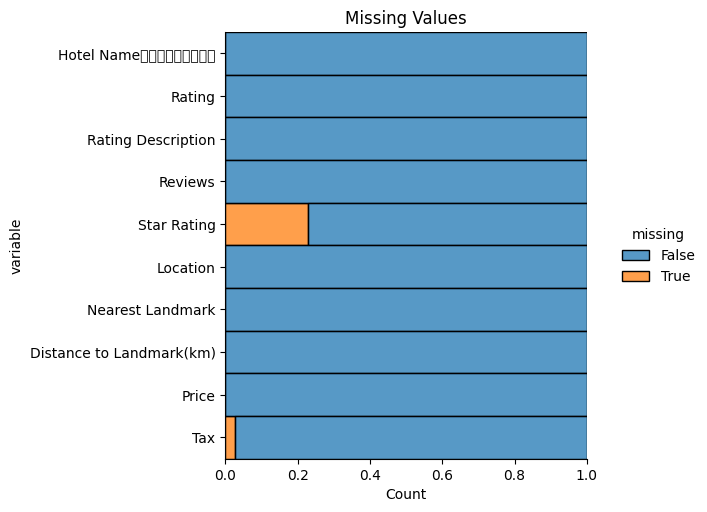

In [ ]:
sns.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.title("Missing Values")

In [ ]:
df= df.fillna(method='ffill')

In [ ]:
df = df.rename(columns= {'Hotel Name\t\t\t\t\t\t\t\t\t' : 'Hotel Name'})

Handling outliers

<Axes: xlabel='Price'>

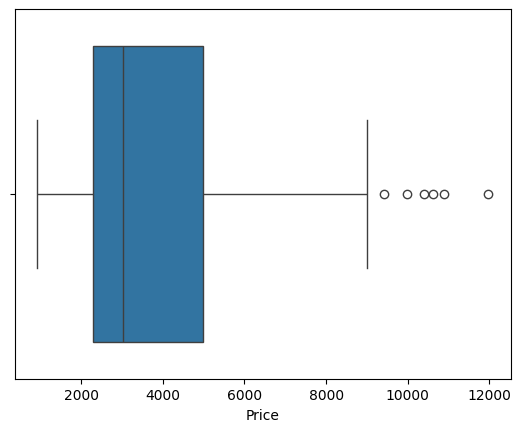

In [ ]:
sns.boxplot(df['Price'],orient='h')

In [ ]:
Q1 = df['Price'].quantile(0.25)
Q3= df['Price'].quantile(0.75)

IQR = Q3-Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['Price'] >= lower_bound) & (df['Price'] <= upper_bound)]

Text(0.5, 1.0, 'Review Distribution')

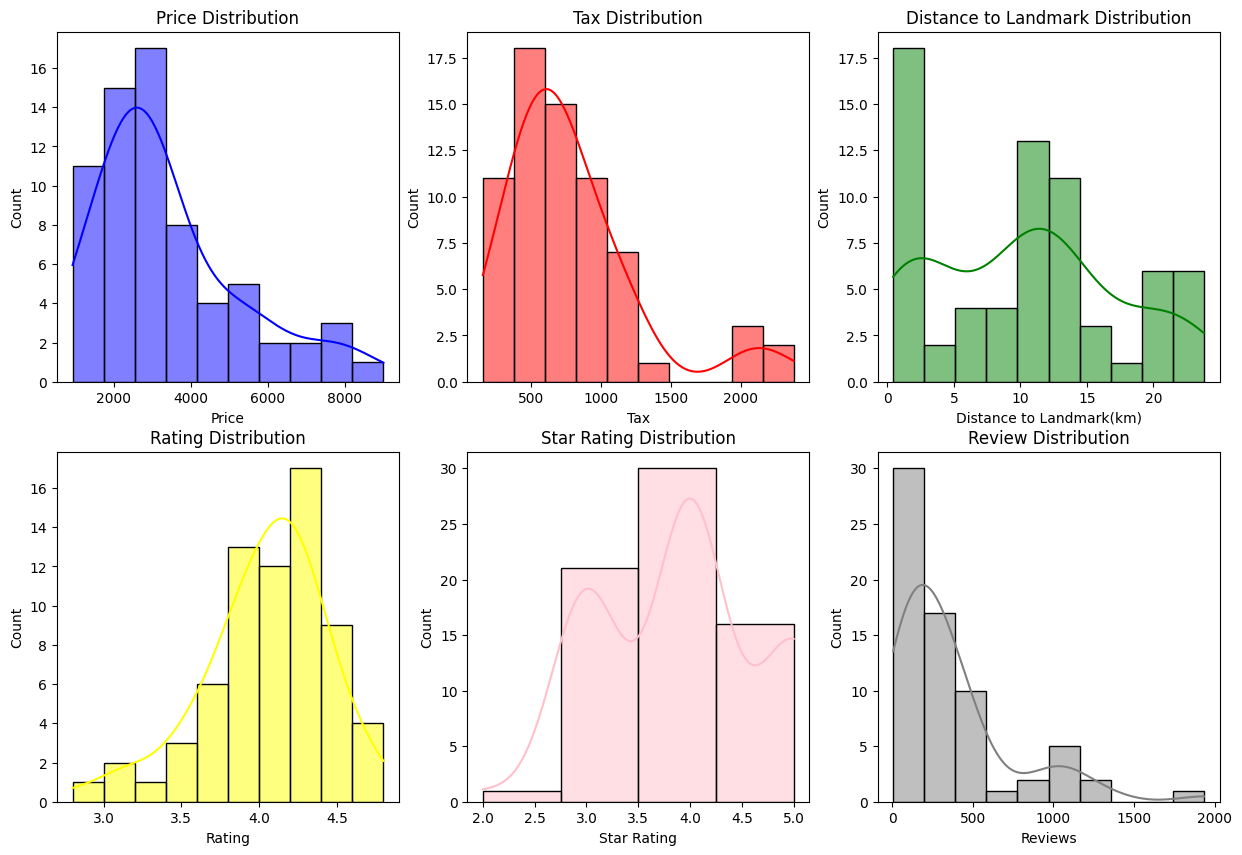

In [ ]:
f, ax = plt.subplots(2,3, figsize = (15,10))

sns.histplot(df['Price'], bins=10, kde=True, color='blue', edgecolor='black', ax=ax[0, 0])
ax[0, 0].set_title('Price Distribution')

sns.histplot(df['Tax'], bins=10, kde=True, color='red', edgecolor='black', ax=ax[0, 1])
ax[0, 1].set_title('Tax Distribution')

sns.histplot(df['Distance to Landmark(km)'], bins=10, kde=True, color='green', edgecolor='black', ax=ax[0, 2])
ax[0, 2].set_title('Distance to Landmark Distribution')

sns.histplot(df['Rating'], bins=10, kde=True, color='yellow', edgecolor='black', ax=ax[1, 0])
ax[1, 0].set_title('Rating Distribution')

sns.histplot(df['Star Rating'], bins=4, kde=True, color='pink', edgecolor='black', ax=ax[1, 1])
ax[1, 1].set_title('Star Rating Distribution')

sns.histplot(df['Reviews'], bins=10, kde=True, color='grey', edgecolor='black', ax=ax[1, 2])
ax[1, 2].set_title('Review Distribution')


In [ ]:
df.style.highlight_max(color="Blue", subset=('Rating Description')).highlight_min(color="Red", subset=('Rating Description'))

,Hotel Name,Rating,Rating Description,Reviews,Star Rating,Location,Nearest Landmark,Distance to Landmark(km),Price,Tax
0,Gokulam Park,4.100000,Very Good,1058,4.000000,Chithirapuram,city centre,10.200000,2728.000000,574.000000
1,Sterling Munnar,3.800000,Very Good,1088,4.000000,Chinnakanal,city centre,19.200000,4451.000000,969.000000
2,Issacs Residency,4.100000,Very Good,322,3.000000,Central Munnar,Attukal Waterfalls,0.950000,2758.000000,684.000000
3,Tea Valley Resort,4.300000,Excellent,1337,4.000000,Pallivasal,city centre,4.800000,2675.000000,756.000000
4,Grand Plaza,4.300000,Excellent,1058,4.000000,Moolakadai,Attukal Waterfalls,1.900000,3203.000000,654.000000
5,Misty Mountain Resort,4.200000,Very Good,1934,4.000000,Pallivasal,city centre,7.500000,3145.000000,848.000000
6,Eastend Munnar,3.900000,Very Good,437,4.000000,Central Munnar,Attukal Waterfalls,0.770000,3493.000000,713.000000
7,Seven Springs Plantation Resort,3.700000,Very Good,6,3.000000,Laxmi Estate,city centre,12.300000,2255.000000,554.000000
8,Clouds Valley Leisure Hotel,4.000000,Very Good,599,4.000000,Near Munnar Bus Stand,Attukal Waterfalls,2.200000,2595.000000,530.000000
9,Broad Bean Resort & Spa,4.100000,Very Good,249,5.000000,Muthirapuzhayar Road,city centre,13.100000,5583.000000,1141.000000


In [ ]:
df.style.background_gradient(cmap= 'Greens', subset=['Star Rating', 'Price', 'Distance to Landmark(km)'])

,Hotel Name,Rating,Rating Description,Reviews,Star Rating,Location,Nearest Landmark,Distance to Landmark(km),Price,Tax
0,Gokulam Park,4.100000,Very Good,1058,4.000000,Chithirapuram,city centre,10.200000,2728.000000,574.000000
1,Sterling Munnar,3.800000,Very Good,1088,4.000000,Chinnakanal,city centre,19.200000,4451.000000,969.000000
2,Issacs Residency,4.100000,Very Good,322,3.000000,Central Munnar,Attukal Waterfalls,0.950000,2758.000000,684.000000
3,Tea Valley Resort,4.300000,Excellent,1337,4.000000,Pallivasal,city centre,4.800000,2675.000000,756.000000
4,Grand Plaza,4.300000,Excellent,1058,4.000000,Moolakadai,Attukal Waterfalls,1.900000,3203.000000,654.000000
5,Misty Mountain Resort,4.200000,Very Good,1934,4.000000,Pallivasal,city centre,7.500000,3145.000000,848.000000
6,Eastend Munnar,3.900000,Very Good,437,4.000000,Central Munnar,Attukal Waterfalls,0.770000,3493.000000,713.000000
7,Seven Springs Plantation Resort,3.700000,Very Good,6,3.000000,Laxmi Estate,city centre,12.300000,2255.000000,554.000000
8,Clouds Valley Leisure Hotel,4.000000,Very Good,599,4.000000,Near Munnar Bus Stand,Attukal Waterfalls,2.200000,2595.000000,530.000000
9,Broad Bean Resort & Spa,4.100000,Very Good,249,5.000000,Muthirapuzhayar Road,city centre,13.100000,5583.000000,1141.000000


Count of Nearest landmark

In [ ]:
nearest_landmark_count = df['Nearest Landmark'].value_counts()
nearest_landmark_count

Nearest Landmark
city centre           50
Attukal Waterfalls    18
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of Nearest Landmark in Data')

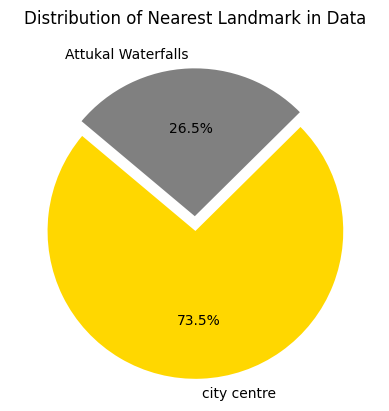

In [ ]:
plt.pie(df['Nearest Landmark'].value_counts(),explode = (0.1,0.0),labels=nearest_landmark_count.keys(), autopct='%1.1f%%', startangle=140, colors= ['gold', 'grey'])
plt.title('Distribution of Nearest Landmark in Data')

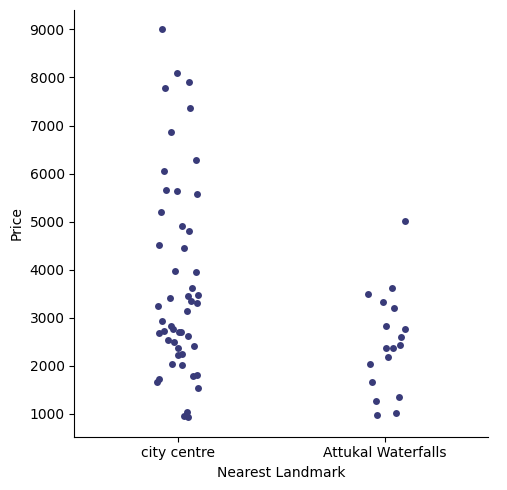

In [ ]:
sns.set_palette("tab20b")
sns.catplot(data= df, x='Nearest Landmark', y="Price", edgecolor='Black')

No. of Hotels in each Location

In [ ]:
Hotels_in_each_location= df['Location'].value_counts().sort_index()

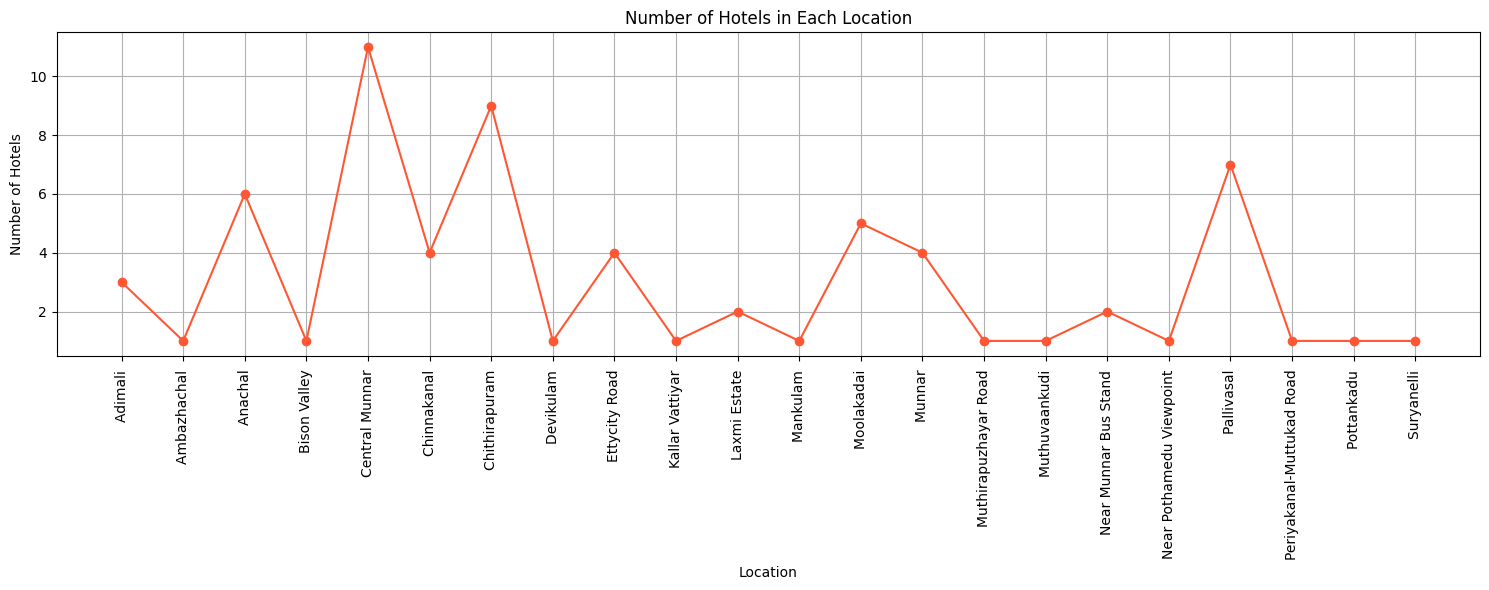

In [ ]:
plt.figure(figsize=(15, 6))
Hotels_in_each_location.plot(kind='line', marker='o', color='#FF5733')
plt.title('Number of Hotels in Each Location')
plt.xlabel('Location')
plt.ylabel('Number of Hotels')
plt.xticks(range(len(Hotels_in_each_location)), Hotels_in_each_location.index, rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-29-e8acd930d744>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df['Rating Description'] , palette= 'cubehelix')


Text(0.5, 1.0, 'Count of Rating Description')

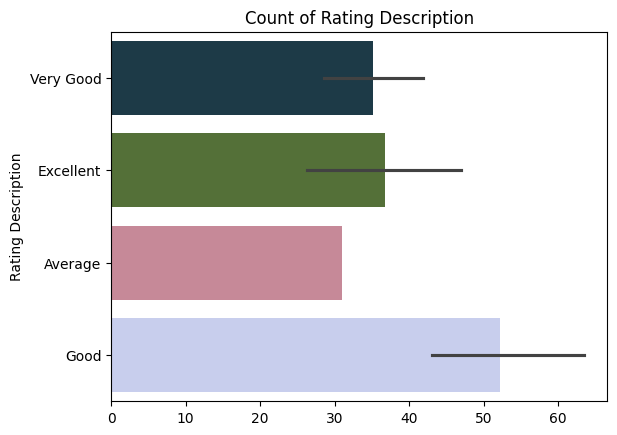

In [ ]:
sns.barplot(data=df['Rating Description'] , palette= 'cubehelix')
plt.title('Count of Rating Description')

Average Price by Star Rating

In [ ]:
star_rating_price= df.groupby('Star Rating')['Price'].mean().round(2)

In [ ]:
styled_star_rating_price = (
    star_rating_price
    .to_frame()
    .style
    .format({'Price': '{:,.2f}'.format})
    .set_properties(**{'text-align': 'right'})
    .background_gradient(cmap='cubehelix', subset=['Price'])
)
styled_star_rating_price

,Price
Star Rating,
2.000000,"2,046.00"
3.000000,"2,350.57"
4.000000,"3,521.93"
5.000000,"4,646.25"


<ipython-input-61-b6c3eed80c4a>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=df, x='Star Rating' , y='Price' , palette= 'mako')


Text(0.5, 1.0, 'Average Price by Rating')

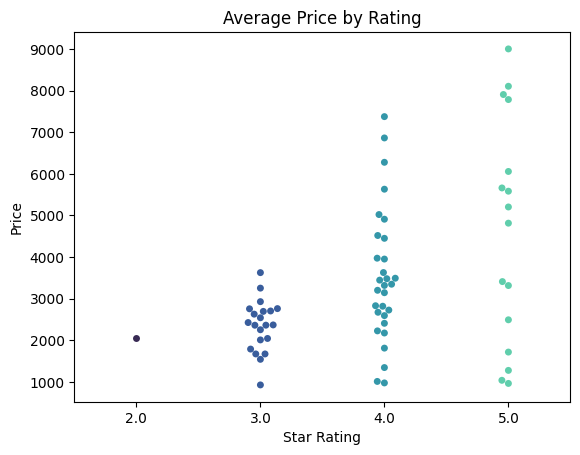

In [ ]:
sns.swarmplot(data=df, x='Star Rating' , y='Price' , palette= 'mako')
plt.title('Average Price by Rating')

Avg Price by Landmark

In [ ]:
avg_price_by_Landmark = df.groupby('Nearest Landmark')[['Rating','Distance to Landmark(km)']].mean().round(2)
avg_price_by_Landmark

,Rating,Distance to Landmark(km)
Nearest Landmark,,
Attukal Waterfalls,3.87,1.60
city centre,4.09,13.44


<ipython-input-55-4a8840063177>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x= 'Price', y = 'Rating Description', data = df, palette= 'Spectral')


<Axes: xlabel='Price', ylabel='Rating Description'>

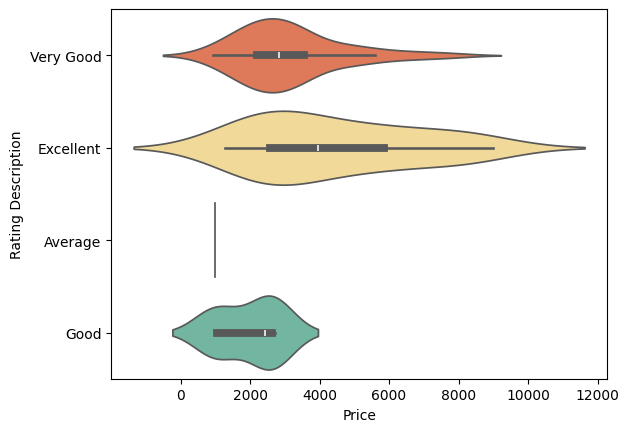

In [ ]:
sns.violinplot(x= 'Price', y = 'Rating Description', data = df, palette= 'Spectral')

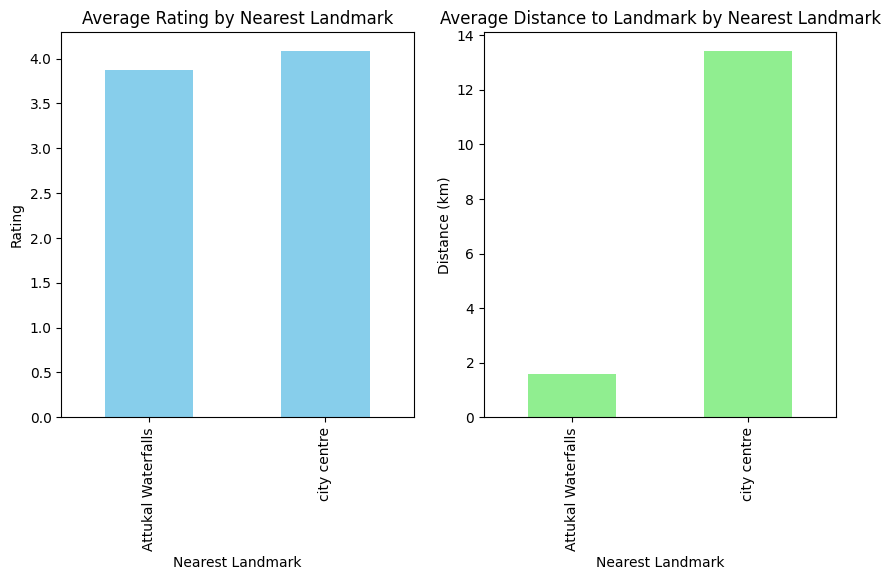

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot average rating
avg_price_by_Landmark['Rating'].plot(kind='bar', ax=axs[0], color='skyblue')
axs[0].set_title('Average Rating by Nearest Landmark')
axs[0].set_ylabel('Rating')

# Plot average distance to landmark
avg_price_by_Landmark['Distance to Landmark(km)'].plot(kind='bar', ax=axs[1], color='lightgreen')
axs[1].set_title('Average Distance to Landmark by Nearest Landmark')
axs[1].set_ylabel('Distance (km)')

plt.show()

<Axes: xlabel='Distance to Landmark(km)', ylabel='Price'>

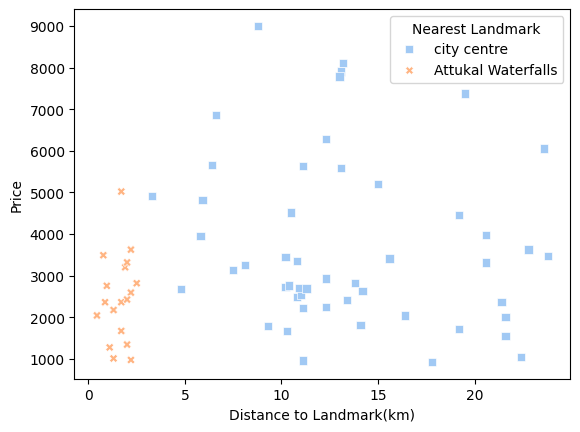

In [ ]:
markers = {"city centre": "s", "Attukal Waterfalls": "X"}
sns.scatterplot(data=df, x="Distance to Landmark(km)", y="Price", hue="Nearest Landmark" ,style="Nearest Landmark", palette='pastel', markers= markers)

Checking Best Hotels in Affordable Price by Distance and Rating

In [ ]:
avg_distance = df['Distance to Landmark(km)'].mean()
avg_price = df['Price'].mean()

In [ ]:
best_hotels = df[(df['Rating'] > 4) & (df['Distance to Landmark(km)']< avg_distance) & (df['Price'] < avg_price)][['Hotel Name', 'Price' , 'Tax']]
best_hotels

,Hotel Name,Price,Tax
0,Gokulam Park,2728.0,574.0
2,Issacs Residency,2758.0,684.0
3,Tea Valley Resort,2675.0,756.0
4,Grand Plaza,3203.0,654.0
5,Misty Mountain Resort,3145.0,848.0
16,Landy Queen Homestay | Rooms & Caretaker,1279.0,269.0
58,Tea Garden Riverside,2177.0,445.0


<Figure size 1200x600 with 0 Axes>

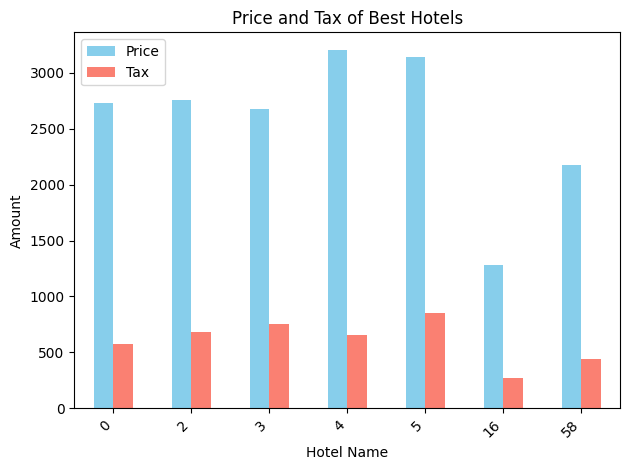

In [ ]:
plt.figure(figsize=(12, 6))
best_hotels[['Price', 'Tax']].plot(kind='bar', stacked=False, color=['skyblue', 'salmon'])
plt.title('Price and Tax of Best Hotels')
plt.xlabel('Hotel Name')
plt.ylabel('Amount')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

<Axes: xlabel='Price', ylabel='Reviews'>

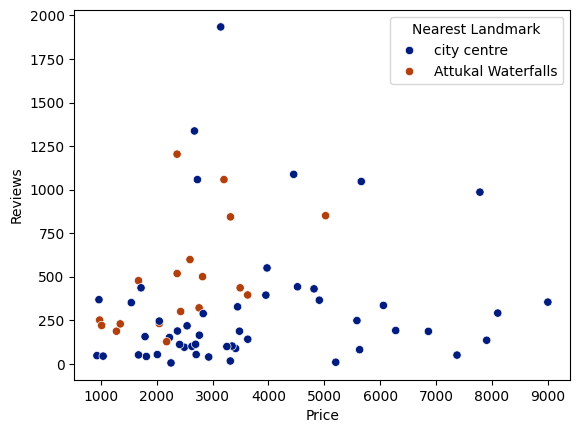

In [ ]:
sns.scatterplot(x= 'Price', y= 'Reviews', data = df, hue='Nearest Landmark', palette='dark')

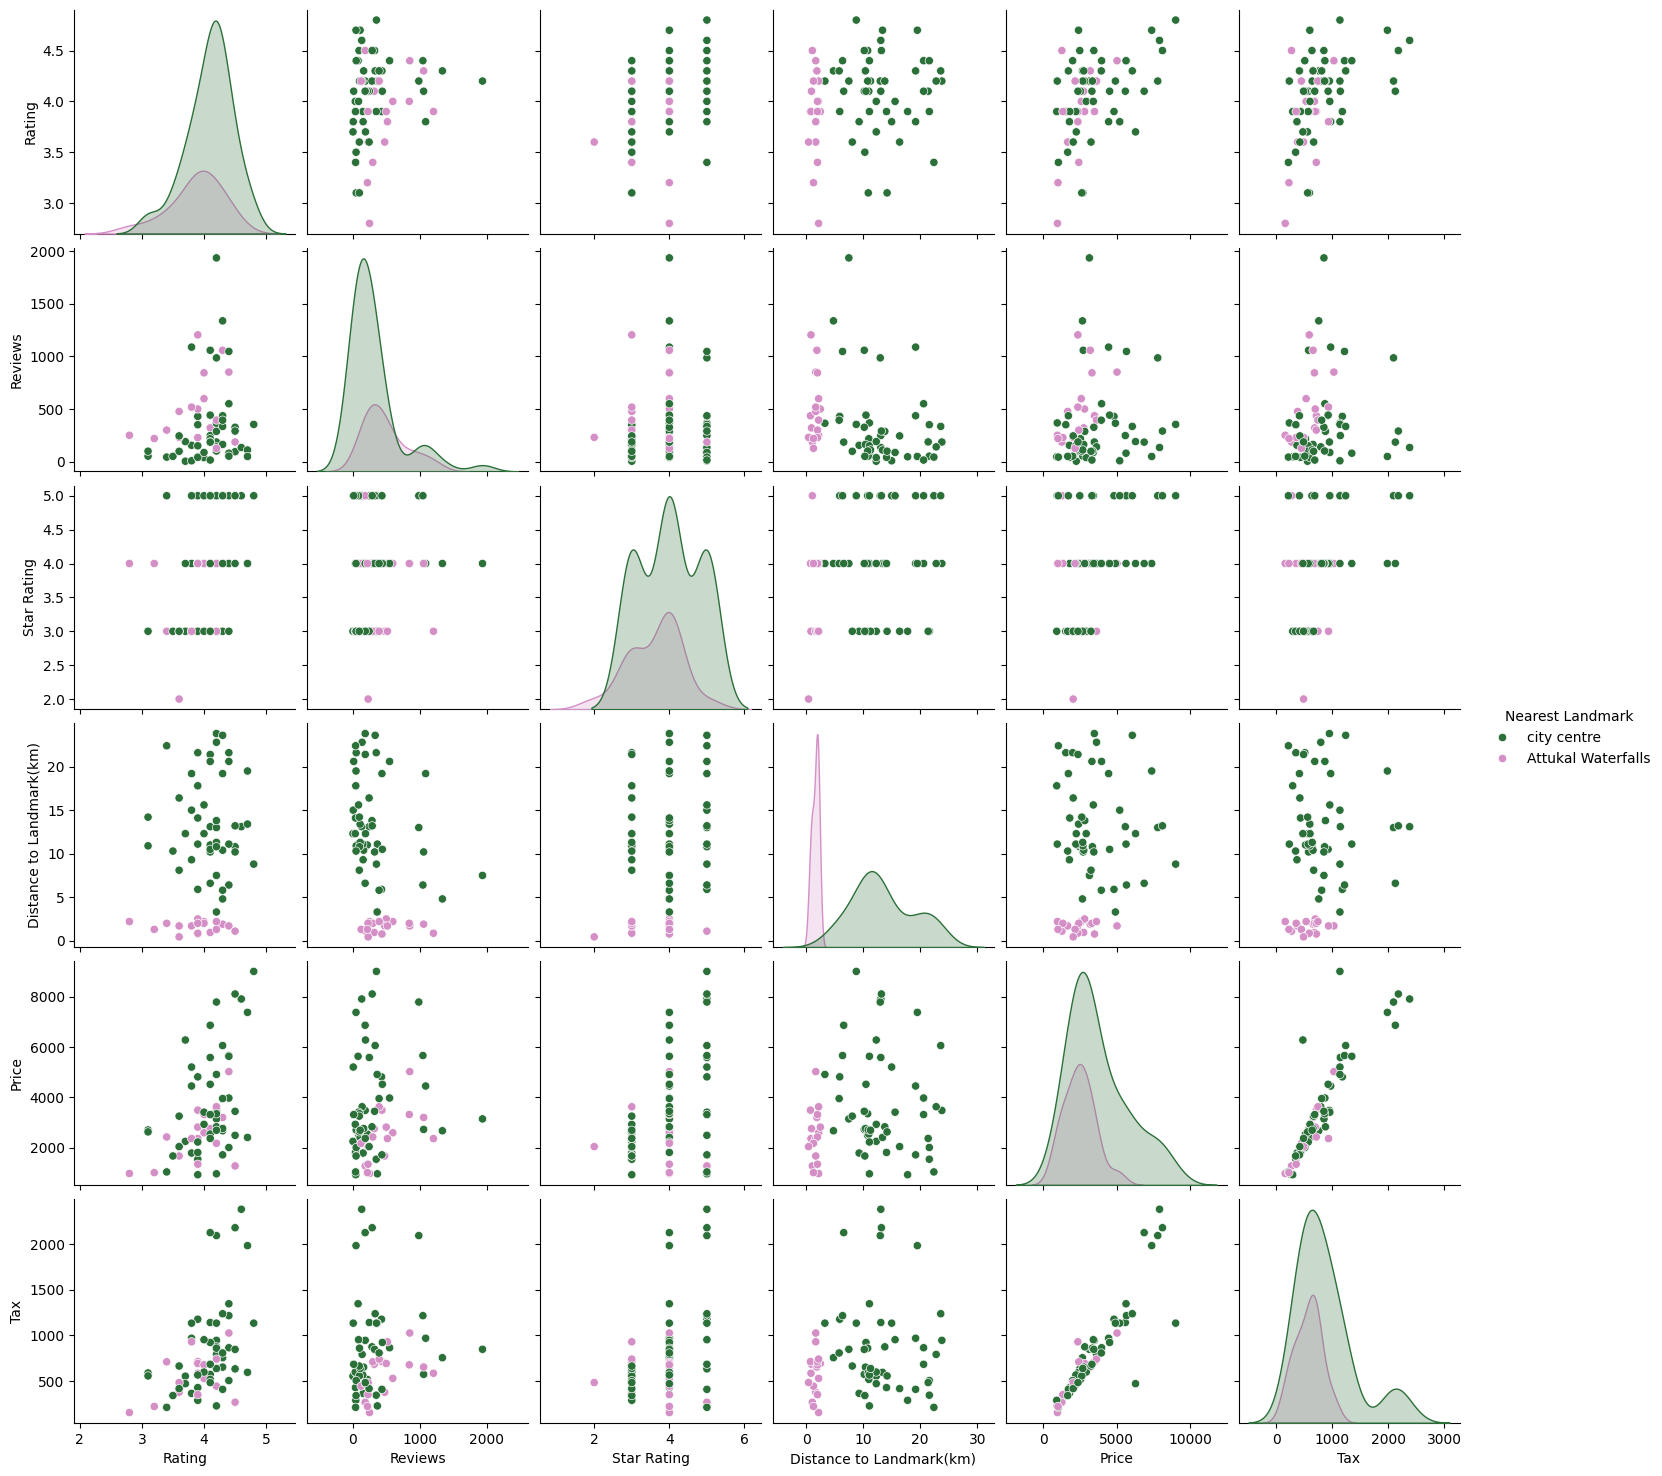

In [ ]:
sns.pairplot(data=df, hue = 'Nearest Landmark' , palette= 'cubehelix')

# Hypothesis Testing

**Does High Ratings Influence Price??**





H0 : There is no correlation between rating and Price.

H1: There is correlation between rating and Price.

In [ ]:
from scipy.stats import pearsonr

rating = df['Rating']
price = df['Price']


correlation_coefficient, p_value = pearsonr(rating, price)
alpha = 0.05

print("Pearson correlation coefficient:", correlation_coefficient)
print("P-value:", p_value)


if p_value < alpha:
    print("Reject the null hypothesis. There is a significant correlation between Rating and Price.")
else:
    print("Fail to reject the null hypothesis. There is no significant correlation between Rating and Price.")

Pearson correlation coefficient: 0.4772296595879882
P-value: 3.875535082660017e-05
Reject the null hypothesis. There is a significant correlation between Rating and Price.


# Data Manipulations Done

*  Converted the data types of 'Price', 'Distance', and 'Tax' to float since they were in object dtype.
*  Converted all distance values to kilometers for consistency.
*  Updated hotel names for clarity.
*  Handled missing values appropriately.
*  Addressed outliers using the Interquartile Range (IQR) method

# Conclusion

*  The dataset indicates a significant concentration of hotels in the city center compared to areas like Attukal Waterfalls.
*  Hotels near Attukal Waterfalls have a narrower price range compared to those in the city center.
*  Analysis reveals that while the majority of ratings are 'Good,' there are also less satisfied guests.
*  There's a positive correlation between ratings and prices, with higher-rated hotels generally having higher prices.
*  Hotels near Attukal Waterfalls tend to have a shorter distance to the landmark compared to those in other areas.
*  The hypothesis testing results suggest that there is a significant positive relationship between high ratings and prices in the hotel industry.